In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

In [11]:
dataset_path = "/content/drive/MyDrive/5Animals"


In [12]:
img_data_generator = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=1./255 ,
    validation_split=0.1,
)
train_data= img_data_generator.flow_from_directory(
    dataset_path ,
    shuffle=True,
    subset="training",
    target_size=(299,299)
)

validation_data = img_data_generator.flow_from_directory(
    dataset_path,
    shuffle=True,
    subset="validation",
    target_size=(299,299)
)

Found 1171 images belonging to 5 classes.
Found 128 images belonging to 5 classes.


In [13]:
initial_model = tf.keras.applications.InceptionResNetV2(weights="imagenet" , include_top=False , input_shape=(299,299,3))
#model.summary()

# Adding fully connected layers to model :

In [14]:
model = tf.keras.models.Sequential([
    initial_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512 , activation="relu"),
    tf.keras.layers.Dense(256 , activation="relu"),
    tf.keras.layers.Dense(5 , activation="softmax")
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Funct  (None, 8, 8, 1536)        54336736  
 ional)                                                          
                                                                 
 flatten_1 (Flatten)         (None, 98304)             0         
                                                                 
 dense_3 (Dense)             (None, 512)               50332160  
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 104801509 (399.79 MB)
Trainable params: 104740965 (399.56 MB)
Non-trainable params: 60544 (236.50 KB)
____

In [15]:
model.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.001) ,
              loss=tf.keras.losses.categorical_crossentropy ,
              metrics=["accuracy"] )

In [16]:
history = model.fit(train_data , validation_data=validation_data , epochs=20)


Epoch 1/20
37/37 [==============================] - 148s 2s/step - loss: 5.0437 - accuracy: 0.7575 - val_loss: 38.6454 - val_accuracy: 0.6953
Epoch 2/20
37/37 [==============================] - 59s 2s/step - loss: 0.2362 - accuracy: 0.9274 - val_loss: 0.3396 - val_accuracy: 0.9375
Epoch 3/20
37/37 [==============================] - 59s 2s/step - loss: 0.0884 - accuracy: 0.9744 - val_loss: 0.2249 - val_accuracy: 0.9531
Epoch 4/20
37/37 [==============================] - 60s 2s/step - loss: 0.0572 - accuracy: 0.9846 - val_loss: 0.0784 - val_accuracy: 0.9766
Epoch 5/20
37/37 [==============================] - 65s 2s/step - loss: 0.0514 - accuracy: 0.9829 - val_loss: 0.1455 - val_accuracy: 0.9609
Epoch 6/20
37/37 [==============================] - 59s 2s/step - loss: 0.0311 - accuracy: 0.9898 - val_loss: 0.1736 - val_accuracy: 0.9688
Epoch 7/20
37/37 [==============================] - 59s 2s/step - loss: 0.0233 - accuracy: 0.9940 - val_loss: 0.1319 - val_accuracy: 0.9766
Epoch 8/20
37/37 [

In [17]:
model.save("/content/5animals_weights.keras")

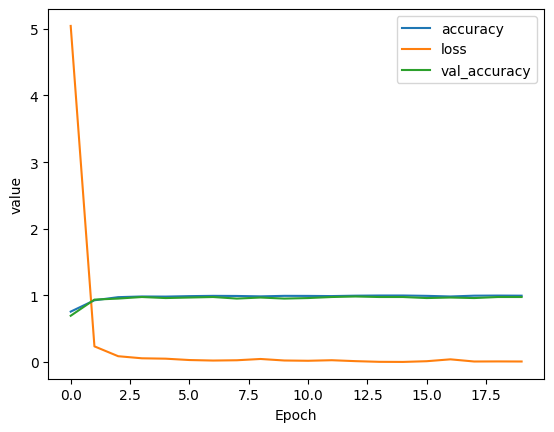

In [18]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["loss"])
plt.plot(history.history["val_accuracy"])
plt.legend(["accuracy","loss" , "val_accuracy" , "val_loss"])
plt.xlabel("Epoch")
plt.ylabel("value")
plt.show()

In [ ]:
images,labels = validation_data[0]
ypred_list = []
for image in images:
    image = np.expand_dims(image, axis=0)
    ypred=model.predict(image)
    ypred_list.append(np.argmax(ypred))
ytrue_list = []
for label in labels:
    ytrue_list.append(np.argmax(label))

In [20]:
np.array(ytrue_list)

array([3, 3, 1, 1, 2, 3, 1, 1, 4, 0, 3, 4, 0, 4, 2, 1, 2, 3, 1, 2, 1, 3,
       0, 4, 2, 0, 1, 0, 1, 3, 3, 3])

In [21]:
np.array(ypred_list)

array([3, 3, 1, 1, 2, 3, 1, 1, 4, 0, 3, 4, 0, 4, 2, 1, 2, 3, 1, 2, 1, 3,
       0, 4, 2, 0, 1, 0, 1, 3, 3, 3])

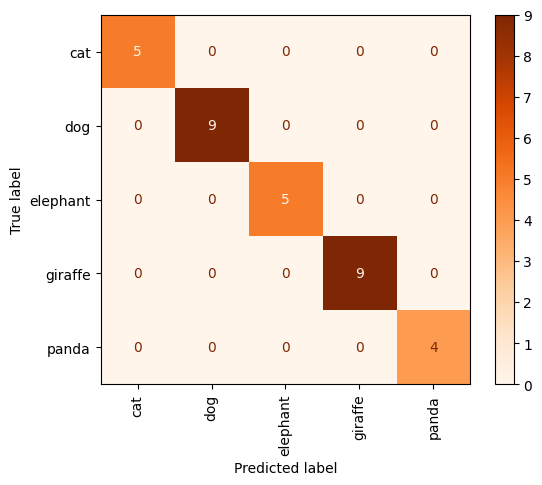

In [22]:
confm = metrics.confusion_matrix(y_true= ytrue_list , y_pred= ypred_list  )
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confm , display_labels=['cat','dog','elephant','giraffe','panda'])
cm_display.plot(cmap=plt.cm.Oranges , xticks_rotation="vertical")
plt.show()

# Inference

1/1 [==============================] - 0s 39ms/step
4
{'cat': 0, 'dog': 1, 'elephant': 2, 'giraffe': 3, 'panda': 4}
predicted label :  panda


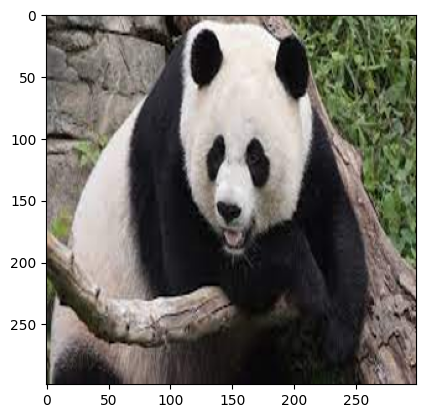

In [46]:
import cv2
from PIL import Image
image = Image.open("/content/pa1.jpg")
new_image = image.resize((299,299))
new_image.save("/content/image.jpg")
plt.imshow(new_image)

new_image = cv2.imread("/content/image.jpg" , 0)
new_image = cv2.cvtColor(new_image , cv2.COLOR_BGR2RGB)
img = np.reshape(new_image, [1, 299, 299, 3])
output = model.predict(img)

predicted_class = np.argmax(output)
print(predicted_class)
print(train_data.class_indices)
mylist = list(train_data.class_indices)
print("predicted label : " , mylist[np.argmax(output)])